In [1]:
import os
import sys
import pickle
import numpy as np
import pandas as pd
from PIL import Image, ImageFilter
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss, confusion_matrix
import matplotlib.pyplot as plt

np.random.seed(100)
LEVEL = 'level_3'


In [2]:
class SigmoidNeuron1:
    def __init__(self):
        self.w = None
        self.b = None  
    def sigmoid(self,X):
        return 1/(1+np.exp(-X))
    def forward_prop(self,X):
        #print("forwar_prop",X.shape,self.w.shape,self.b,self.sigmoid(np.dot (X,self.w) + self.b).shape)
        return self.sigmoid(np.dot (X,self.w) + self.b)
    def backward_prop(self,X,Y):
        m = X.shape[0]
        #print(self.forward_prop(X).shape,Y.reshape(-1,1).shape)
        dz = self.forward_prop(X) -Y.reshape(-1,1) 
        #print("dz X",dz.shape,X.shape,type(dz))
        db = 1/m*np.sum(dz)
        dw = 1/m*np.dot(X.T,dz)
        #print("dw db",dw.shape,db)
        return dw,db
    def loss(self,y,y_predict):
        m=y.shape[0]
        y=y.reshape(-1,1)
        print(y.shape)
        #print(y_predict)
        for i,j,k in zip(y,y_predict,(y*np.log(y_predict)+(1-y)*np.log(1-y_predict))):
            print(i,j,k)
            print(i*np.log(j))
            print(1-i,np.log(1-j),(1-i)*np.log(1-j))
        print((y*np.log(y_predict)+(1-y)*np.log(1-y_predict)))
        return -1/m*np.sum(y*np.log(y_predict)+(1-y)*np.log(1-y_predict))
    def update(self,dw,db,learning_rate):
        self.w  = self.w -learning_rate* dw
        self.b  = self.b -learning_rate* db 
    def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, loss_fn="mse",display_loss=False):
        loss_list =[]
        if(initialise):
            self.w = np.zeros((X.shape[1],1))
            self.b = 0
            dw     = 0
            db     = 0
            best_w = 0
            best_b = 0
            best_acc =0
        for iter1 in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):    
                y_predict = self.forward_prop(X)
                #print(y_predict)
                if((iter1+1)%2000==0):
                    learning_rate =learning_rate*0.75
                    print(learning_rate)    
                dw,db = self.backward_prop(X,Y)
                self.update(dw,db,learning_rate)
                y_predict = self.forward_prop(X)
                loss_list.append(log_loss(Y,y_predict))
                y_predict =(y_predict>= 0.5).astype(int)
                accuracy = accuracy_score(y_predict,Y.reshape(-1,1))
                if(accuracy>=best_acc):
                    best_acc = accuracy
                    best_w   = self.w
                    best_b   = self.b
        self.w   = best_w
        self.b   = best_b
                #print(y_predict)
        if display_loss:
            #print(loss_list)
            print("w,b",self.w,self.b)
            plt.plot(loss_list)
            plt.xlabel('Epochs')
            plt.ylabel('Log Loss')
            plt.show()
    def predict(self,X):
        return self.forward_prop(X)         

In [3]:
def read_all(folder_path, key_prefix=""):
    '''
    It returns a dictionary with 'file names' as keys and 'flattened image arrays' as values.
    '''
    print("Reading:")
    images = {}
    files = os.listdir(folder_path)
    print (files)
    for i, file_name in tqdm_notebook(enumerate(files), total=len(files)):
        file_path = os.path.join(folder_path, file_name)
        image_index = key_prefix + file_name[:-4]
        image = Image.open(file_path)
        image = image.convert("L")
        #thresh2 =
        img        = cv2.imread(file_path)
        image   =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret,thresh2 = cv2.threshold(image,10,255,cv2.THRESH_BINARY_INV)
        images[image_index] = np.array(thresh2.copy()).flatten()
        #image.close()
    return images

In [4]:
LEVEL = 'level_3'
languages = ['ta', 'hi', 'en']
import cv2
images_train = read_all("../input/"+ LEVEL+ "_train/" +LEVEL+"/"+"background", key_prefix='bgr_') # change the path
for language in languages:
   images_train.update(read_all("../input/"+ LEVEL+ "_train/" +LEVEL+"/"+language, key_prefix=language+"_" ))
print(len(images_train))

images_test = read_all("../input/"+ LEVEL+ "_test/" +"kaggle_"+LEVEL, key_prefix='')

Reading:
['displayPanel_5_flip_blur_d2.jpg', 'door_36_rotate_blur.jpg', 'wall_11_rotate_edgeEnhance.jpg', 'wall_13_rotate_none_d2.jpg', 'dressingCase_3_none_smooth_d2.jpg', 'mountain_8_flip_blur_d2.jpg', 'tent_12_flip_smooth.jpg', 'mountain_23_flip_none_d2.jpg', 'dressingCase_3_rotate_smooth.jpg', 'mountain_17_none_none_d3.jpg', 'door_33_none_edgeEnhance_d2.jpg', 'tent_13_none_edgeEnhance_d2.jpg', 'door_1_rotate_sharpen.jpg', 'door_15_rotate_blur_d3.jpg', 'tent_13_flip_smooth_d3.jpg', 'tent_10_rotate_smooth_d2.jpg', 'wall_0_flip_blur_d2.jpg', 'fabric_15_none_blur.jpg', 'envelope_9_flip_sharpen_d3.jpg', 'door_13_none_sharpen_d2.jpg', 'fabric_32_flip_smooth_d2.jpg', 'dressingCase_0_none_blur.jpg', 'door_41_rotate_none_d2.jpg', 'fabric_34_flip_sharpen_d2.jpg', 'tent_6_none_smooth.jpg', 'door_40_none_smooth.jpg', 'door_15_none_blur_d3.jpg', 'fabric_29_flip_none.jpg', 'fabric_6_rotate_blur_d3.jpg', 'fabric_25_flip_none_d3.jpg', 'tent_11_rotate_none_d2.jpg', 'door_27_rotate_edgeEnhance_d2.jp


Reading:
['envelope_13_rotate_blur_c27_0.jpg', 'door_39_rotate_sharpen_c35_14.jpg', 'wall_11_rotate_none_c68_0.jpg', 'mountain_11_flip_blur_c62_6.jpg', 'door_3_none_smooth_c42_7.jpg', 'door_12_rotate_smooth_c91_8.jpg', 'fabric_37_none_sharpen_c9_5.jpg', 'door_21_rotate_smooth_c27_13.jpg', 'tent_12_rotate_smooth_c71_5.jpg', 'envelope_6_rotate_blur_c62_3.jpg', 'door_34_none_edgeEnhance_c76_13.jpg', 'mountain_10_none_smooth_c64_4.jpg', 'mountain_0_none_blur_c45_8.jpg', 'fabric_22_none_blur_c12_13.jpg', 'mountain_22_rotate_smooth_c16_9.jpg', 'displayPanel_2_rotate_none_c3_6.jpg', 'door_9_rotate_sharpen_c59_8.jpg', 'door_38_none_none_c26_3.jpg', 'door_5_none_sharpen_c79_0.jpg', 'fabric_23_none_edgeEnhance_c30_6.jpg', 'door_37_rotate_sharpen_c15_14.jpg', 'envelope_1_rotate_blur_c84_2.jpg', 'envelope_11_none_none_c89_11.jpg', 'wall_9_none_none_c41_10.jpg', 'envelope_9_rotate_edgeEnhance_c22_4.jpg', 'fabric_36_flip_edgeEnhance_c60_8.jpg', 'wall_0_rotate_none_c86_12.jpg', 'fabric_15_flip_edgeE


Reading:
['mountain_9_flip_sharpen_c11_92.jpg', 'tent_5_none_blur_c9_89.jpg', 'mountain_9_none_none_c11_24.jpg', 'door_38_flip_blur_c3_42.jpg', 'tent_8_rotate_edgeEnhance_c10_61.jpg', 'tent_6_none_sharpen_c3_60.jpg', 'door_12_rotate_smooth_c4_3.jpg', 'dressingCase_6_none_none_c1_47.jpg', 'tent_3_flip_none_c4_74.jpg', 'fabric_6_flip_sharpen_c10_18.jpg', 'door_7_flip_smooth_c0_47.jpg', 'wall_11_none_edgeEnhance_c10_93.jpg', 'dressingCase_5_flip_sharpen_c7_73.jpg', 'fabric_4_none_none_c1_34.jpg', 'envelope_3_rotate_sharpen_c5_49.jpg', 'fabric_17_flip_smooth_c10_0.jpg', 'mountain_21_flip_smooth_c5_50.jpg', 'door_6_none_blur_c8_44.jpg', 'mountain_7_none_smooth_c10_89.jpg', 'dressingCase_3_none_edgeEnhance_c4_73.jpg', 'mountain_15_flip_blur_c1_61.jpg', 'door_16_rotate_blur_c2_31.jpg', 'door_1_none_sharpen_c8_25.jpg', 'door_0_none_blur_c2_9.jpg', 'door_5_flip_none_c0_52.jpg', 'mountain_23_flip_none_c0_68.jpg', 'wall_11_rotate_sharpen_c1_18.jpg', 'fabric_26_rotate_sharpen_c8_75.jpg', 'tent_11


Reading:
['dressingCase_4_flip_edgeEnhance_c47_397.jpg', 'wall_3_flip_sharpen_c10_1373.jpg', 'envelope_1_rotate_sharpen_c20_1428.jpg', 'displayPanel_1_flip_none_c39_1135.jpg', 'envelope_10_flip_edgeEnhance_c38_1089.jpg', 'mountain_16_flip_smooth_c10_584.jpg', 'mountain_17_rotate_blur_c34_61.jpg', 'door_1_none_sharpen_c22_553.jpg', 'fabric_37_none_none_c37_3.jpg', 'dressingCase_3_none_none_c11_367.jpg', 'fabric_28_none_edgeEnhance_c39_1287.jpg', 'fabric_36_flip_edgeEnhance_c29_391.jpg', 'fabric_25_flip_none_c36_278.jpg', 'fabric_21_flip_smooth_c1_1053.jpg', 'wall_6_rotate_smooth_c20_1214.jpg', 'door_13_flip_sharpen_c4_510.jpg', 'fabric_11_rotate_sharpen_c29_1016.jpg', 'mountain_15_rotate_smooth_c8_386.jpg', 'envelope_16_rotate_none_c3_358.jpg', 'tent_12_rotate_edgeEnhance_c5_1185.jpg', 'dressingCase_0_rotate_smooth_c37_163.jpg', 'door_25_flip_edgeEnhance_c15_632.jpg', 'door_4_flip_smooth_c31_1408.jpg', 'tent_7_rotate_smooth_c47_983.jpg', 'tent_5_none_blur_c38_571.jpg', 'wall_14_rotate_


9000
Reading:
['2562.jpg', '2864.jpg', '1441.jpg', '2051.jpg', '1111.jpg', '2184.jpg', '1436.jpg', '2546.jpg', '2166.jpg', '145.jpg', '2684.jpg', '1912.jpg', '2981.jpg', '1313.jpg', '672.jpg', '1765.jpg', '2292.jpg', '2713.jpg', '388.jpg', '1256.jpg', '406.jpg', '1152.jpg', '2637.jpg', '408.jpg', '774.jpg', '1593.jpg', '670.jpg', '2639.jpg', '2377.jpg', '491.jpg', '1517.jpg', '716.jpg', '531.jpg', '1732.jpg', '668.jpg', '1584.jpg', '2066.jpg', '1901.jpg', '34.jpg', '2894.jpg', '1651.jpg', '2734.jpg', '482.jpg', '2895.jpg', '941.jpg', '2820.jpg', '2935.jpg', '2239.jpg', '1090.jpg', '688.jpg', '1070.jpg', '2674.jpg', '2430.jpg', '1163.jpg', '2832.jpg', '2501.jpg', '2732.jpg', '696.jpg', '1580.jpg', '1604.jpg', '535.jpg', '2372.jpg', '90.jpg', '1760.jpg', '1826.jpg', '2721.jpg', '529.jpg', '860.jpg', '1231.jpg', '835.jpg', '1644.jpg', '1546.jpg', '569.jpg', '1735.jpg', '2675.jpg', '261.jpg', '2946.jpg', '2056.jpg', '2603.jpg', '578.jpg', '48.jpg', '1233.jpg', '1717.jpg', '1304.jpg', '289

In [5]:
list(images_test.keys())[:5]

['2562', '2864', '1441', '2051', '1111']

In [6]:
X_train = []
Y_train = []
for key, value in images_train.items():
    X_train.append(value)
    if key[:4] == "bgr_":
        Y_train.append(0)
    else:
        Y_train.append(1)

ID_test = []
X_test = []
for key, value in images_test.items():
  ID_test.append(int(key))
  X_test.append(value)
  
        
X_train = np.array(X_train)/255
Y_train = np.array(Y_train)
X_test = np.array(X_test)/255

print(X_train.shape, Y_train.shape)
print(X_test.shape)

(9000, 4096) (9000,)
(3000, 4096)


In [7]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [8]:
#sn_mse = SigmoidNeuron1()
#sn_mse.fit(X_scaled_train, Y_train, epochs=5000, learning_rate=0.005, loss_fn="mse", display_loss=True)

In [9]:
#sn_mse = SigmoidNeuron1()
#sn_mse.fit(X_scaled_train, Y_train, epochs=5000, learning_rate=0.009, loss_fn="ce", display_loss=True)

In [10]:


from sklearn.model_selection import KFold # import KFold

kf = KFold(n_splits=2,shuffle=True) # Define the split - into 10 folds 
kf.get_n_splits(X_scaled_train) # returns the number of splitting iterations in the cross-validator
#print(kf) 


def cross_validation(learning_rate,epochs):
    acc =[]
    for train_index, test_index in kf.split(X_scaled_train):
        #print(train_index,test_index)
        sn_ce = SigmoidNeuron1()
        sn_ce.fit(X_scaled_train[train_index], Y_train[train_index], epochs=epochs, learning_rate=learning_rate, loss_fn="ce", display_loss=True)
        Y_pred_binarised_train = (sn_ce.predict(X_scaled_train[test_index])>= 0.5).astype("int").ravel()
        accuracy_test = accuracy_score(Y_pred_binarised_train, Y_train[test_index])
        acc.append(accuracy_test)
    print(acc)
    accuracy =sum(acc)/len(acc)
    return accuracy



In [11]:
#epochs_list =[4000,6000]
#lr_rate_list =[0.01,0.06]
#acc_dic ={}
#for epoch in epochs_list:
#    for lr_rate in lr_rate_list:
#        acc_dic[(epoch,lr_rate)] = cross_validation(lr_rate,epoch)

#print(acc_dic)

In [12]:
#Grid Search
#epochs_list =[40,100,1000,2000]
#lr_rate_list =[0.006,0.020,0.015,0.010,0.008]
#acc_dic ={}
#for epoch in epochs_list:
#    for lr_rate in lr_rate_list:
#        acc_dic[(epoch,lr_rate)] = cross_validation(lr_rate,epoch)

#print(acc_dic)

In [13]:
#sn_ce = SigmoidNeuron1()
#best_epoch   = 10000
#best_lr_rate = 0.0011
#sn_ce.fit(X_scaled_train, Y_train, epochs=best_epoch, learning_rate=best_lr_rate, loss_fn="ce", display_loss=True)
#Y_pred_binarised_train = (sn_ce.predict(X_scaled_train)>= 0.5).astype("int").ravel()


0.045
0.03375
0.0253125
0.018984375

w,b [[-0.01663277]
 [-0.10295221]
 [ 0.02157806]
 ...
 [ 0.11503032]
 [-0.0315958 ]
 [ 0.01401894]] 2.233315348525116


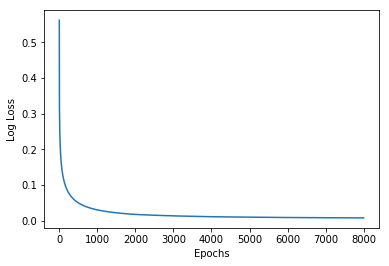

In [14]:

sn_ce = SigmoidNeuron1()
best_epoch   = 8000
best_lr_rate = 0.06
sn_ce.fit(X_scaled_train, Y_train, epochs=best_epoch, learning_rate=best_lr_rate, loss_fn="ce", display_loss=True)
Y_pred_binarised_train = (sn_ce.predict(X_scaled_train)>= 0.5).astype("int").ravel()

In [15]:
def print_accuracy(sn):
  Y_pred_train = sn.predict(X_scaled_train)
  Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
  accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
  print("Train Accuracy : ", accuracy_train)
  print("-"*50)

In [16]:
print_accuracy(sn_mse)
print_accuracy(sn_ce)

NameError: name 'sn_mse' is not defined

## Sample Submission

In [17]:
Y_pred_test = sn_ce.predict(X_scaled_test)
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()

submission = {}
submission['ImageId'] = ID_test
submission['Class'] = Y_pred_binarised_test

submission = pd.DataFrame(submission)
submission = submission[['ImageId', 'Class']]
submission = submission.sort_values(['ImageId'])
submission.to_csv("submisision.csv", index=False)

In [18]:
!pwd


/kaggle/working
